In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Fetch MNIST data and split it into train, images and labels, and test, images and labels too

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Shape of train images: {}'.format(train_images.shape))
print('Shape of train labels: {}'.format(train_labels.shape))
print()
print('Shape of test images: {}'.format(test_images.shape))
print('Shape of test labels: {}'.format(test_labels.shape))

Shape of train images: (60000, 28, 28)
Shape of train labels: (60000,)

Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


In [4]:
print('train labels: {}'.format(train_labels))

train labels: [5 0 4 ... 5 6 8]


Plot first train image.
value 0 -> black
value 255 -> white

In [5]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

First 10 train images in MNIST dataset:


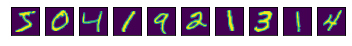

train labels matching: [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 train images in MNIST dataset:')
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('train labels matching: {}'.format(train_labels[:10]))

Reshape data: (60000 * 28 * 28) to (60000 * 28 * 28 * 1)

In [7]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

Models:
+ 3 layers + 1 convolution layer
+ 5 layers + 2 convolution layers
+ 7 layers + 4 convolution layers

In [8]:
def select_model(model_number):
    all_models = [
        # model number 1
        models.Sequential([
            layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            layers.MaxPool2D((2, 2)),
            layers.Flatten(),
            layers.Dense(10, activation = 'softmax')
        ]),
        # model number 2
        models.Sequential([
            layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            layers.MaxPool2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation = 'relu'),
            layers.MaxPool2D((2, 2)),
            layers.Flatten(),
            layers.Dense(10, activation = 'softmax')
        ]),
        # model number 3
        models.Sequential([
            layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            layers.MaxPool2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation = 'relu'),
            layers.Conv2D(64, (3, 3), activation = 'relu'),
            layers.MaxPool2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation = 'relu'),
            layers.Flatten(),
            layers.Dense(10, activation = 'softmax')
        ])
    ]
    return all_models[model_number - 1]

In [9]:
model = select_model(2)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = [ 'accuracy' ]
)

Training:

In [12]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3809 - accuracy: 0.9441
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0706 - accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0596 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0494 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0438 - accuracy: 0.9866


Test step:

In [13]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print()
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(accuracy))

313/313 - 1s - loss: 0.0615 - accuracy: 0.9834

Test loss: 0.061482176184654236
Test accuracy: 0.9833999872207642


In [14]:
test_images = tf.cast(test_images, tf.float32)
prediction = model.predict(test_images)
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
print('Prediction shape: {}'.format(prediction.shape))
print('Test labels shape: {}'.format(test_labels.shape))

Prediction shape: (10000, 10)
Test labels shape: (10000,)


Functions for plot images, probability:

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(numbers[predicted_label], 
                                         100 * np.max(predictions_array),
                                         numbers[true_label],
                                         color = color
                                        )
              )
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(numbers)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

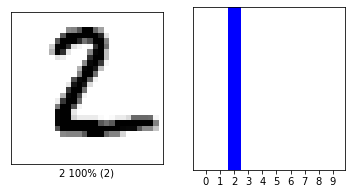

In [18]:
i = 1
plt.figure(figsize = (6, 3))
plt.subplot(i, 2, 1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(i, 2, 2)
plot_value_array(i, prediction, test_labels)
plt.show()

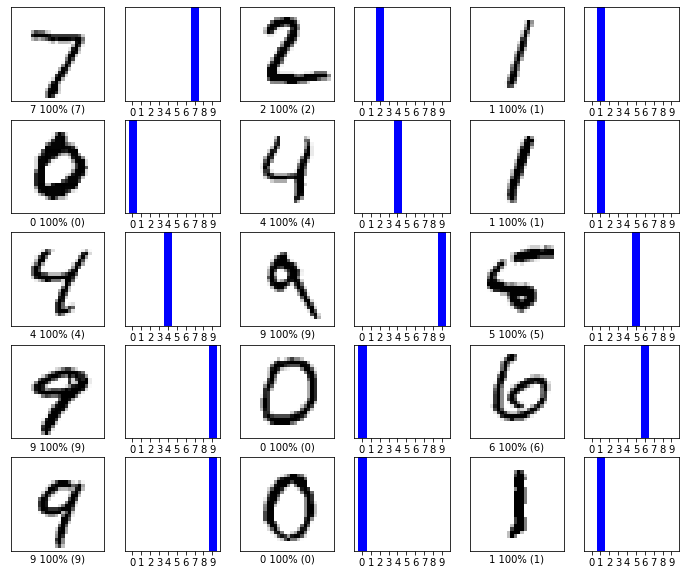

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, prediction, test_labels)
plt.show()

Plot images and probability that model predicted wrong

In [20]:
def error_mnist(prediction_array, true_label):
    error_indexes = []
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_indexes.append(i)
    return error_indexes

def plot_error(indexes, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
    
    for i in range(len(indexes[:num_cols * num_rows])):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        idx = indexes[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(numbers)

In [21]:
indexes = error_mnist(prediction, test_labels)
indexes_slice = indexes[:10]
print(indexes_slice)

[62, 217, 259, 290, 320, 321, 406, 448, 449, 495]


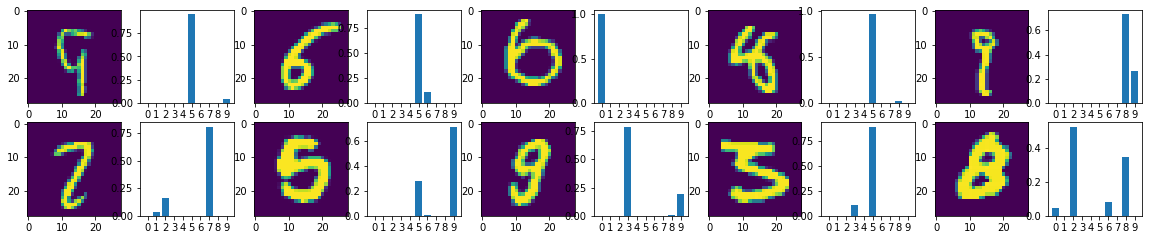

In [22]:
plot_error(indexes_slice, prediction, test_labels)

Done